<a href="https://colab.research.google.com/github/w4bo/AA2526-unibo-mldm/blob/master/slides/lab-03-datapreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [244]:
import pandas as pd  # data wrangling
import numpy as np  # fast operations on arrays
import seaborn as sns  # plots
import matplotlib.pyplot as plt  # plots

df = pd.DataFrame([
    [100,   'low',    '05/07/2021', 10, 2],
    [101,  'medium', '05/07/2021', 25, 1],
    [102,   'high',   '06/07/2021', 100, 3],
    [103, 'high',   '06/07/2021', np.nan, 4],
    [104,  'medium', '06/07/2021', 25, 5]], columns=['ID', 'PriceBin', 'Date', 'Quantity', 'Review'])
df

,ID,PriceBin,Date,Quantity,Review
0,100,low,05/07/2021,10.0,2
1,101,medium,05/07/2021,25.0,1
2,102,high,06/07/2021,100.0,3
3,103,high,06/07/2021,NaN,4
4,104,medium,06/07/2021,25.0,5


# What transformations can we apply?

- **Encoding**: transforming categorical attributes into continuous ones
- **Discretization**: transforming continuous attributes into categorical ones
- **Normalization**: normalizing continuous attributes such that their values fall in the same range
- **Imputation**: imputing missing values
- **Rebalancing**: adjusting the class distribution of a dataset (i.e., the ratio between the different classes/categories represented)
- **Feature Engineering**: defining the set of relevant attributes (variables, predictors) to be used in model construction

# Data distribution

In [245]:
# array with distinct values sorted by first appearance
df["Quantity"].unique()

array([ 10.,  25., 100.,  nan])

In [246]:
# quantity of unique values
df["Quantity"].nunique()

3

# Data distribution

In [247]:
# return a new series that associates each value with its number of occurrences, sorted by frequency
df["Quantity"].value_counts()

Quantity
25.0     2
10.0     1
100.0    1
Name: count, dtype: int64

<Axes: >

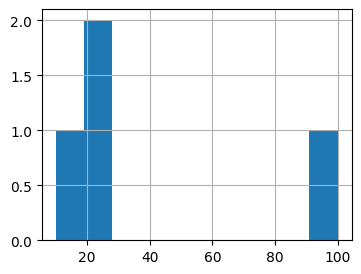

In [248]:
plt.figure(figsize=(4, 3))
df["Quantity"].hist(bins=10)

# Missing values

Datasets often show missing values

- E.g., they are not applicable (e.g., date of death) or unknown
- A series can have missing values, referred to as `NA` (Not Available)
- Numeric attributes: `NA` is `np.nan` (Not a Number)
- `nan` is never equal, greater, or lower than other values (nor itself)

        np.nan == np.nan
        False
- Numeric expressions with `nan` return `nan`

        2 * np.nan – 1
        nan


In [249]:
# add the column "isna", True if the value is NaN
df["isna"] = df["Quantity"].isna()
# add the column "notna", False if the value is NaN
df["notna"] = df["Quantity"].notna()
df[["Quantity", "isna", "notna"]]

,Quantity,isna,notna
0,10.0,False,True
1,25.0,False,True
2,100.0,False,True
3,NaN,True,False
4,25.0,False,True


# Imputing missing values

Several strategies

- Replace `nan` with average or median values
- Dropping rows/columns with nans
- Backward/forward fill

Questions:

- What are the effects of imputation?
- What if we have temporal attributes?

## Filling the values

In [250]:
df["Quantity_mean"] = df["Quantity"].fillna(df["Quantity"].mean())  # fill the missing value with the average
df["Quantity_ffill"] = df["Quantity"].ffill()  # fill the missing value with the previous (not NaN) value
df["Quantity_bfill"] = df["Quantity"].bfill()  # fill the missing value with the following (not NaN) value
imputed_df = df[[x for x in df.columns if "Quantity" in x]]
imputed_df

,Quantity,Quantity_mean,Quantity_ffill,Quantity_bfill
0,10.0,10.0,10.0,10.0
1,25.0,25.0,25.0,25.0
2,100.0,100.0,100.0,100.0
3,NaN,40.0,100.0,25.0
4,25.0,25.0,25.0,25.0


In [251]:
imputed_df.describe()

,Quantity,Quantity_mean,Quantity_ffill,Quantity_bfill
count,4.000000,5.000000,5.000000,5.000000
mean,40.000000,40.000000,52.000000,37.000000
std,40.620192,35.178118,44.243644,35.812009
min,10.000000,10.000000,10.000000,10.000000
25%,21.250000,25.000000,25.000000,25.000000
50%,25.000000,25.000000,25.000000,25.000000
75%,43.750000,40.000000,100.000000,25.000000
max,100.000000,100.000000,100.000000,100.000000


# What happens to data distribution?

- Create a dataframe with 1000 sales, and randomly set 5% of them to `NaN`
- Then, impute them 

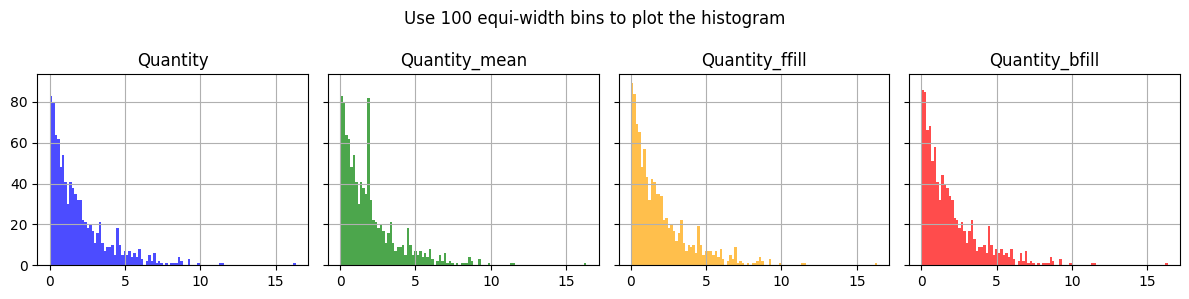

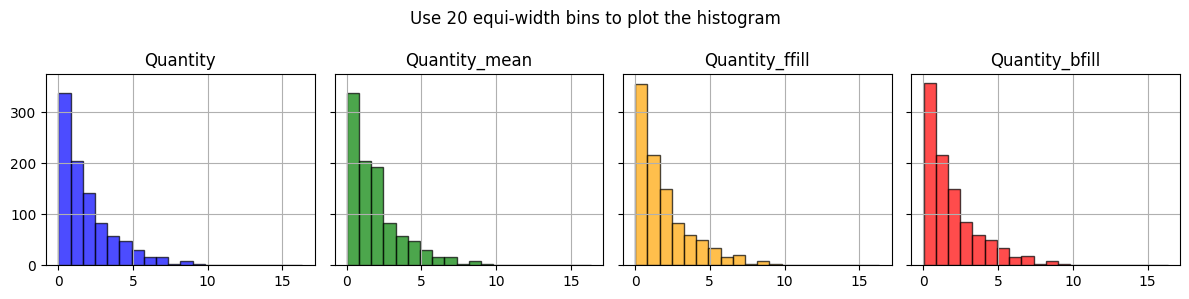

In [252]:
#| echo: false

for bins in [100, 20]:
    np.random.seed(42)  # for reproducibility
    sales_data = np.random.exponential(scale=2, size=1000)  # exponential data for left skewness
    imputed_df = pd.DataFrame({'Quantity': sales_data})  # create the dataframe
    nan_indices = np.random.choice(imputed_df.index, size=int(0.05 * len(imputed_df)), replace=False)  # set 5% of quantities to NaN
    imputed_df.loc[nan_indices, 'Quantity'] = np.nan
    imputed_df['Quantity_mean'] = imputed_df['Quantity'].fillna(imputed_df['Quantity'].mean())  # mean imputation
    imputed_df['Quantity_ffill'] = imputed_df['Quantity'].bfill()  # bfill imputation
    imputed_df['Quantity_bfill'] = imputed_df['Quantity'].ffill()  # ffill imputation
    fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)  # plot histograms for original and imputed data
    for i, (title, color) in enumerate([('Quantity', 'blue'), ('Quantity_mean', 'green'), ('Quantity_ffill', 'orange'), ('Quantity_bfill', 'red')]):
        axs[i].set_title(title)
        axs[i].hist(imputed_df[title], bins=bins, color=color, alpha=0.7, edgecolor='black' if bins < 50 else None)
        axs[i].grid()
    fig.suptitle(f"Use {bins} equi-width bins to plot the histogram")
    fig.tight_layout()
    # fig.savefig(f"./img/datapreprocessing/imputation_{bins}.svg")

# Equi-frequency histogram

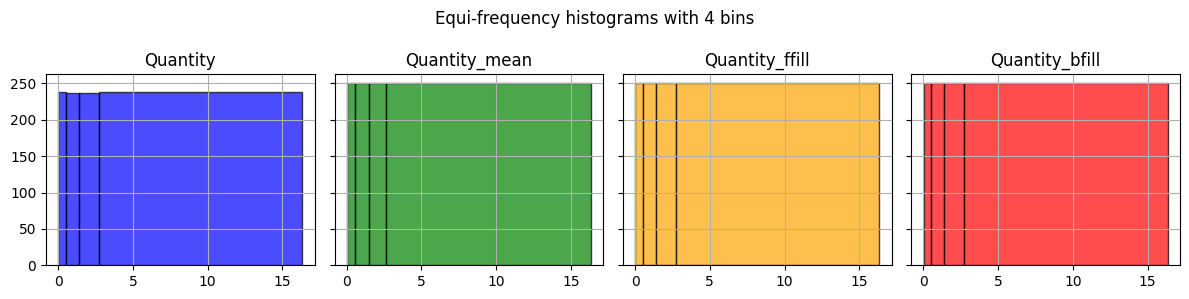

In [253]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)
for i, (title, color) in enumerate([('Quantity', 'blue'), ('Quantity_mean', 'green'), ('Quantity_ffill', 'orange'), ('Quantity_bfill', 'red')]):
    axs[i].set_title(f'{title}')
    # Calculate bin edges based on quantiles
    bin_edges = np.quantile(imputed_df[title].dropna(), [0, 0.25, 0.5, 0.75, 1.0])
    axs[i].hist(imputed_df[title], bins=bin_edges, color=color, alpha=0.7, edgecolor='black')
    axs[i].grid()

fig.suptitle("Equi-frequency histograms with 4 bins")
fig.tight_layout()
# fig.savefig("./img/datapreprocessing/imputation_equi_frequency.svg")

## Dropping values

In [254]:
df.drop(columns=["Quantity"])  # drop the `Quantity` column

,ID,PriceBin,Date,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill
0,100,low,05/07/2021,2,False,True,10.0,10.0,10.0
1,101,medium,05/07/2021,1,False,True,25.0,25.0,25.0
2,102,high,06/07/2021,3,False,True,100.0,100.0,100.0
3,103,high,06/07/2021,4,True,False,40.0,100.0,25.0
4,104,medium,06/07/2021,5,False,True,25.0,25.0,25.0


In [255]:
df.dropna()  # drop all rows with missing values in any column
df.dropna(subset=["Quantity"])  # drop all rows with missing values in the column `Quantity`

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill
0,100,low,05/07/2021,10.0,2,False,True,10.0,10.0,10.0
1,101,medium,05/07/2021,25.0,1,False,True,25.0,25.0,25.0
2,102,high,06/07/2021,100.0,3,False,True,100.0,100.0,100.0
4,104,medium,06/07/2021,25.0,5,False,True,25.0,25.0,25.0


# Encoding: `PriceBin`

In [256]:
price_map = {'low': 10, 'medium': 20, 'high': 30}
df['PriceBin_encoded'] = df['PriceBin'].map(price_map)
df

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill,PriceBin_encoded
0,100,low,05/07/2021,10.0,2,False,True,10.0,10.0,10.0,10
1,101,medium,05/07/2021,25.0,1,False,True,25.0,25.0,25.0,20
2,102,high,06/07/2021,100.0,3,False,True,100.0,100.0,100.0,30
3,103,high,06/07/2021,NaN,4,True,False,40.0,100.0,25.0,30
4,104,medium,06/07/2021,25.0,5,False,True,25.0,25.0,25.0,20


What about dates?

# Encoding: `Date`

In [257]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Setting the date format is essential!
df['Date_unix'] = df['Date'].astype(int) // 10**9  # Convert to seconds since epoch
df

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill,PriceBin_encoded,Date_unix
0,100,low,2021-05-07,10.0,2,False,True,10.0,10.0,10.0,10,1620345600
1,101,medium,2021-05-07,25.0,1,False,True,25.0,25.0,25.0,20,1620345600
2,102,high,2021-06-07,100.0,3,False,True,100.0,100.0,100.0,30,1623024000
3,103,high,2021-06-07,NaN,4,True,False,40.0,100.0,25.0,30,1623024000
4,104,medium,2021-06-07,25.0,5,False,True,25.0,25.0,25.0,20,1623024000


# Data integration

In [258]:
products_df = pd.DataFrame({'ProductID': [100, 101, 102, 103, 104], 'ProductName': ['Cola', 'Bread', 'Beer', 'Diaper', 'Pizza']})
products_df.head(2)

,ProductID,ProductName
0,100,Cola
1,101,Bread


In [259]:
print(f"df: {list(df.columns)}")
print(f"products_df: {list(products_df.columns)}")

df: ['ID', 'PriceBin', 'Date', 'Quantity', 'Review', 'isna', 'notna', 'Quantity_mean', 'Quantity_ffill', 'Quantity_bfill', 'PriceBin_encoded', 'Date_unix']
products_df: ['ProductID', 'ProductName']


In [260]:
products_df = products_df.rename({"ProductID": "ID"}, axis=1)
combined_df = pd.merge(df, products_df, on='ID', how='left')
combined_df.head(2)

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_mean,Quantity_ffill,Quantity_bfill,PriceBin_encoded,Date_unix,ProductName
0,100,low,2021-05-07,10.0,2,False,True,10.0,10.0,10.0,10,1620345600,Cola
1,101,medium,2021-05-07,25.0,1,False,True,25.0,25.0,25.0,20,1620345600,Bread


# Exercise

1. [Create](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) a sales dataframe. Hint: use `pd.DataFrame()`

```python
{
    'ID': [1, 2, 3, 4, 5],
    'ProductID': [101, 102, 103, 101, 104],
    'PriceBin': ['Low', 'Medium', 'High', 'Low', 'Low'],
    'Date': ['10/01/2024', '10/02/2024', '10/03/2024', '10/04/2024', '10/05/2024'],
    'Quantity': [5, 10, np.nan, 20, 15]
}
```

2. [Create](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) a products dataframe. Hint: use `pd.DataFrame()`

```python
{
    'productid': [101, 102, 103, 104],
    'ProductName': ['Product A', 'Product B', 'Product C', 'Product D']
}
```

3. Handle missing values in `sales_df`. Hint: use method `fillna()`, check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
4. Convert `Date` to Unix timestamp.
5. Calculate a column `Total Sales` (quantity * price), assuming that `{'Low': 10, 'Medium': 20, 'High': 30}`.
    - Hint 1: use the method `.map()` to encode the price column. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)
    - Hint 2: you can refer to the columns with the notation `df["column-name"]`
6. Ordinal encode `PriceBin`. Use the method `.map()`
7. Scale `Quantity` with min-max normalization
8. Join `sales_df` with `products_df` on `ProductID`. Hint: use the method `.merge()`, see the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
9. Print the final dataframe


In [261]:
# Write your code here

# Additional material

# Market cap weight

Get historical stock data

In [262]:
#| output: false
#| echo: false

import yfinance as yf
from datetime import datetime


def my_melt(data, first=True):
    new_df = pd.DataFrame()
    for c in data.columns:
        c_df = (data[c[0]].reset_index(drop=False).melt(id_vars="Date", var_name="Ticker", value_name=c[0]))
        if first:
            new_df = c_df
            first = False
        else: new_df = pd.merge(new_df, c_df, on=["Date", "Ticker"], how="left")
    return new_df


def get_sp500_historical_data(start_date, end_date, ticker):  # Fetch historical data for S&P 500
    data = yf.download(ticker, start=start_date, end=end_date)  # Download historical data
    my_melt(data).to_csv(f"datasets/stocks/daily/{ticker.replace("^", "")}.csv", header=True, index=False)
    return data


start_date = "1990-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")
yesterday = (datetime.today() - pd.Timedelta(days=1)).strftime("%Y-%m-%d")

In [263]:
import requests

def get_sp500_tickers():  # Fetch S&P 500 tickers from Wikipedia.
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    html = requests.get(url).text
    tables = pd.read_html(html)
    sp500_table = tables[0]
    tickers = sp500_table['Symbol'].tolist()
    return tickers

tickers = get_sp500_tickers() + ["^GSPC"]
for ticker in tickers:
    get_sp500_historical_data(start_date, end_date, ticker)  # Fetch data

/tmp/ipykernel_14603/1096283789.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***

In [264]:
#| output: false
#| echo: false

import os

directory = './datasets/stocks/daily'  # Directory containing the CSV files
dfs = []  # List to hold dataframes
for filename in os.listdir(directory):  # Iterate over all files in the directory
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)  # Concatenate all dataframes

/tmp/ipykernel_14603/3019694194.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dfs, ignore_index=True)  # Concatenate all dataframes


In [265]:
merged_df

,Date,Ticker,Close,High,Low,Open,Volume,Adj Close
0,1999-11-18,A,26.511734,30.126972,24.101576,27.415542,62546380,NaN
1,1999-11-19,A,24.327530,25.909195,23.988601,25.871535,15234146,NaN
2,1999-11-22,A,26.511734,26.511734,24.139234,24.892409,6577870,NaN
3,1999-11-23,A,24.101583,26.285790,24.101583,25.607933,5975611,NaN
4,1999-11-24,A,24.741777,25.269000,24.101578,24.176897,4843231,NaN
...,...,...,...,...,...,...,...,...
3539418,2025-01-02,ZTS,162.610001,165.660004,162.000000,164.869995,2232800,NaN
3539419,2025-01-03,ZTS,163.309998,163.869995,160.589996,162.240005,2206400,NaN
3539420,2025-01-06,ZTS,165.899994,167.580002,162.039993,162.770004,2733900,NaN
3539421,2025-01-07,ZTS,163.490005,165.500000,161.360001,163.199997,2488500,NaN


## Vocabulary

In the context of stocks and financial markets, **close**, **volume**, and **shares outstanding** mean:

**Close**: the last price at which it was traded during a trading session.

- Often compared to the stock's previous closing price to calculate daily percentage changes or trends over time.

**Volume**: the total number of shares traded (bought and sold) during a given period, typically a single trading day.

- *High Volume*: Indicates strong investor interest or significant news affecting the stock.
- *Low Volume*: Suggests less activity, possibly due to a lack of news or investor interest.

**Shares Outstanding**: The total number of shares of a company's stock that are currently held by all shareholders

- Used to calculate key metrics such as **Earnings Per Share (EPS)** and **Market Capitalization**.

- $\text{Market Capitalization} = \text{Shares Outstanding} \times \text{Current Stock Price}$

## Get shares outstanding

In [266]:

shares_outstanding = {}

for ticker in tickers:
    c = yf.Ticker(ticker)
    shares_outstanding[ticker] = { "Ticker": ticker, "Shares": c.info.get('sharesOutstanding'), "Name": c.info.get('shortName') }

In [267]:
shares_outstanding_df = pd.DataFrame(shares_outstanding.values(), columns=['Ticker', 'Shares', 'Name'])
shares_outstanding_df["Date"] = yesterday
shares_outstanding_df

,Ticker,Shares,Name,Date
0,MMM,5.445590e+08,3M Company,2025-01-08
1,AOS,1.191100e+08,A.O. Smith Corporation,2025-01-08
2,ABT,1.734460e+09,Abbott Laboratories,2025-01-08
3,ABBV,1.767140e+09,AbbVie Inc.,2025-01-08
4,ACN,6.254800e+08,Accenture plc,2025-01-08
...,...,...,...,...
499,YUM,2.790720e+08,"Yum! Brands, Inc.",2025-01-08
500,ZBRA,5.158000e+07,Zebra Technologies Corporation,2025-01-08
501,ZBH,1.990740e+08,"Zimmer Biomet Holdings, Inc.",2025-01-08
502,ZTS,4.511650e+08,Zoetis Inc.,2025-01-08


## Merge the two sources

In [268]:
merge = pd.merge(merged_df[merged_df["Date"] == yesterday], shares_outstanding_df, on=['Ticker', 'Date'], how='left')
merge["Market Cap"] = merge["Shares"] * merge["Close"]
merge["Market Cap (%)"] = merge["Market Cap"] / merge["Market Cap"].sum() * 100
merge

,Date,Ticker,Close,High,Low,Open,Volume,Adj Close,Shares,Name,Market Cap,Market Cap (%)
0,2025-01-08,A,137.000000,137.679993,135.630005,137.679993,1684600,NaN,NaN,"Agilent Technologies, Inc.",NaN,NaN
1,2025-01-08,AAPL,242.699997,243.710007,240.050003,241.919998,37564700,NaN,1.511580e+10,Apple Inc.,3.668605e+12,7.126829
2,2025-01-08,ABBV,178.500000,179.240005,176.179993,179.199997,4486800,NaN,1.767140e+09,AbbVie Inc.,3.154345e+11,0.612780
3,2025-01-08,ABNB,130.800003,131.630005,130.100006,131.199997,3204100,NaN,4.328770e+08,"Airbnb, Inc.",5.662031e+10,0.109994
4,2025-01-08,ABT,114.250000,114.309998,112.260002,113.540001,4455200,NaN,1.734460e+09,Abbott Laboratories,1.981621e+11,0.384960
...,...,...,...,...,...,...,...,...,...,...,...,...
497,2025-01-08,XYL,115.910004,116.050003,114.250000,115.160004,1274500,NaN,2.429450e+08,Xylem Inc.,2.815975e+10,0.054705
498,2025-01-08,YUM,127.739998,128.229996,126.970001,127.790001,2025400,NaN,2.790720e+08,"Yum! Brands, Inc.",3.564866e+10,0.069253
499,2025-01-08,ZBH,101.540001,103.339996,100.669998,102.919998,2385600,NaN,1.990740e+08,"Zimmer Biomet Holdings, Inc.",2.021397e+10,0.039269
500,2025-01-08,ZBRA,397.000000,399.799988,391.100006,393.829987,411300,NaN,5.158000e+07,Zebra Technologies Corporation,2.047726e+10,0.039780


## Plot the top-k companies

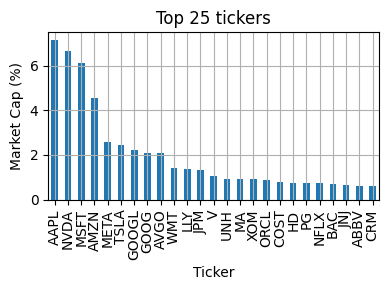

In [269]:
fig, ax = plt.subplots(figsize=(4, 3))
n = 25
sorted = merge.sort_values(by="Market Cap (%)", ascending=False).head(n=n)
sorted.plot.bar(x="Ticker", y="Market Cap (%)", ax=ax)
ax.grid()
ax.legend().remove()
ax.set_ylabel("Market Cap (%)")
ax.set_title(f"Top {n} tickers")
fig.tight_layout()
fig.savefig("./img/datapreprocessing/market_cap_topn.svg")
fig.savefig("./img/datapreprocessing/market_cap_topn.pdf")

## Plot the overal distribution

/tmp/ipykernel_14603/3431765619.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = merge.groupby("Bin")["Market Cap (%)"].count()
/tmp/ipykernel_14603/3431765619.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_tickers = merge.groupby("Bin")["Ticker"].apply(list)


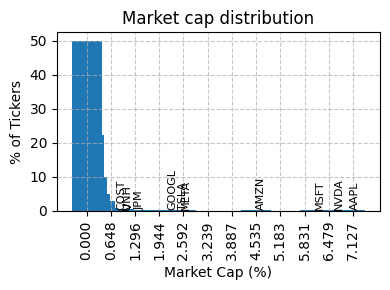

In [270]:
import numpy as np
n = 100
bins = np.linspace(0, merge["Market Cap (%)"].max(), n)  # 5 bins from 0 to 3
merge["Bin"] = pd.cut(merge["Market Cap (%)"], bins)
bin_counts = merge.groupby("Bin")["Market Cap (%)"].count()
bin_left_edges = bins[:-1]
bin_tickers = merge.groupby("Bin")["Ticker"].apply(list)
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(bin_left_edges, bin_counts / merge["Ticker"].nunique() * 100) # , tick_label=bin_counts.index.astype(str)
for i, bar in enumerate(bars):
    tickers_in_bin = bin_counts.iloc[i]
    tickers = bin_tickers.iloc[i]
    if tickers_in_bin < 2:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, ", ".join(tickers), va='bottom', fontsize=8, rotation=90)
ax.set_xticks(bins[::9])
ax.set_xticklabels([f"{x:.3f}" for x in bins][::9], rotation=90)
ax.set_ylabel("% of Tickers")
ax.set_xlabel("Market Cap (%)")
ax.set_title("Market cap distribution")
ax.grid(linestyle='--', alpha=0.7)  # axis='y',
fig.tight_layout()
fig.savefig("./img/datapreprocessing/market_cap_distribution.svg")
fig.savefig("./img/datapreprocessing/market_cap_distribution.pdf")

In [271]:
print(f"Mean: {merge["Market Cap"].mean().round()}, Median: {merge["Market Cap"].median().round()}")


Mean: 103158262914.0, Median: 36666524821.0


## Price weighted index

A **price-weighted index** is an index where each constituent makes up a fraction of the index that is proportional to its share cost

- A stock trading at $100 will thus be making up 10 times more of the total index compared to a stock trading at $10.

The *Dow Jones Industrial Average* (DJIA) and *Nikkei* are examples of price-weighted stock market indexes.

In [ ]:
import requests

def get_dow_jones_tickers():
    url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
    html = requests.get(url).text
    tables = pd.read_html(html)
    dow_jones_table = tables[2]  # The second table contains the tickers
    dow_jones_table.to_csv("./datasets/stocks/DJIA/tickers.csv", header=True, index=False)
    return dow_jones_table

dow_jones_tickers = get_dow_jones_tickers()
dow_jones_tickers.head()

/tmp/ipykernel_14603/2777751685.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.83%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,4.12%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,3.76%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,3.02%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.33%
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,2.15%
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,5.41%
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.18%
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.82%
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,0.86%


## Merging with S&P stocks

In [273]:
djia = pd.merge(dow_jones_tickers, merge, left_on='Symbol', right_on='Ticker', how='left')
djia.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting,Date,Ticker,Close,High,Low,Open,Volume,Adj Close,Shares,Name,Market Cap,Market Cap (%),Bin
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.83%,2025-01-08,MMM,134.529999,134.679993,131.660004,132.029999,4675400,NaN,5.445590e+08,3M Company,7.325952e+10,0.142318,"(0.072, 0.144]"
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,4.12%,2025-01-08,AXP,302.850006,304.200012,298.850006,301.899994,2061300,NaN,7.044450e+08,American Express Company,2.133412e+11,0.414448,"(0.36, 0.432]"
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,3.76%,2025-01-08,AMGN,264.209991,264.250000,259.820007,261.970001,2421500,NaN,5.375330e+08,Amgen Inc.,1.420216e+11,0.275899,"(0.216, 0.288]"
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,3.02%,2025-01-08,AMZN,222.130005,223.520004,220.199997,223.190002,25002200,NaN,1.051500e+10,"Amazon.com, Inc.",2.335697e+12,4.537451,"(4.535, 4.607]"
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.33%,2025-01-08,AAPL,242.699997,243.710007,240.050003,241.919998,37564700,NaN,1.511580e+10,Apple Inc.,3.668605e+12,7.126829,"(7.055, 7.127]"


In [274]:
djia["PWI (%)"] = djia["Close"] / djia["Close"].sum() * 100
djia.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting,Date,Ticker,Close,...,Low,Open,Volume,Adj Close,Shares,Name,Market Cap,Market Cap (%),Bin,PWI (%)
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.83%,2025-01-08,MMM,134.529999,...,131.660004,132.029999,4675400,NaN,5.445590e+08,3M Company,7.325952e+10,0.142318,"(0.072, 0.144]",1.939571
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,4.12%,2025-01-08,AXP,302.850006,...,298.850006,301.899994,2061300,NaN,7.044450e+08,American Express Company,2.133412e+11,0.414448,"(0.36, 0.432]",4.366305
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,3.76%,2025-01-08,AMGN,264.209991,...,259.820007,261.970001,2421500,NaN,5.375330e+08,Amgen Inc.,1.420216e+11,0.275899,"(0.216, 0.288]",3.809217
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,3.02%,2025-01-08,AMZN,222.130005,...,220.199997,223.190002,25002200,NaN,1.051500e+10,"Amazon.com, Inc.",2.335697e+12,4.537451,"(4.535, 4.607]",3.202534
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.33%,2025-01-08,AAPL,242.699997,...,240.050003,241.919998,37564700,NaN,1.511580e+10,Apple Inc.,3.668605e+12,7.126829,"(7.055, 7.127]",3.499100


In [284]:
#| output: false
#| echo: false

print(djia[["Ticker", "Close", "Shares", "PWI (%)", "Market Cap (%)"]].to_markdown(index=False))

| Ticker   |   Close |      Shares |   PWI (%) |   Market Cap (%) |
|:---------|--------:|------------:|----------:|-----------------:|
| MMM      |  134.53 | 5.44559e+08 |  1.93957  |         0.142318 |
| AXP      |  302.85 | 7.04445e+08 |  4.36631  |         0.414448 |
| AMGN     |  264.21 | 5.37533e+08 |  3.80922  |         0.275899 |
| AMZN     |  222.13 | 1.0515e+10  |  3.20253  |         4.53745  |
| AAPL     |  242.7  | 1.51158e+10 |  3.4991   |         7.12683  |
| BA       |  171.76 | 7.48176e+08 |  2.47633  |         0.249644 |
| CAT      |  361.07 | 4.82802e+08 |  5.20569  |         0.338654 |
| CVX      |  150.3  | 1.78292e+09 |  2.16693  |         0.520579 |
| CSCO     |   59.2  | 3.98276e+09 |  0.853509 |         0.458038 |
| KO       |   61.71 | 4.3078e+09  |  0.889697 |         0.516424 |
| DIS      |  109.76 | 1.81094e+09 |  1.58245  |         0.386139 |
| GS       |  580.02 | 3.1391e+08  |  8.36237  |         0.353707 |
| HD       |  387.2  | 9.93363e+08 |  5.58241  |

## Comparing PWI and Market Cap

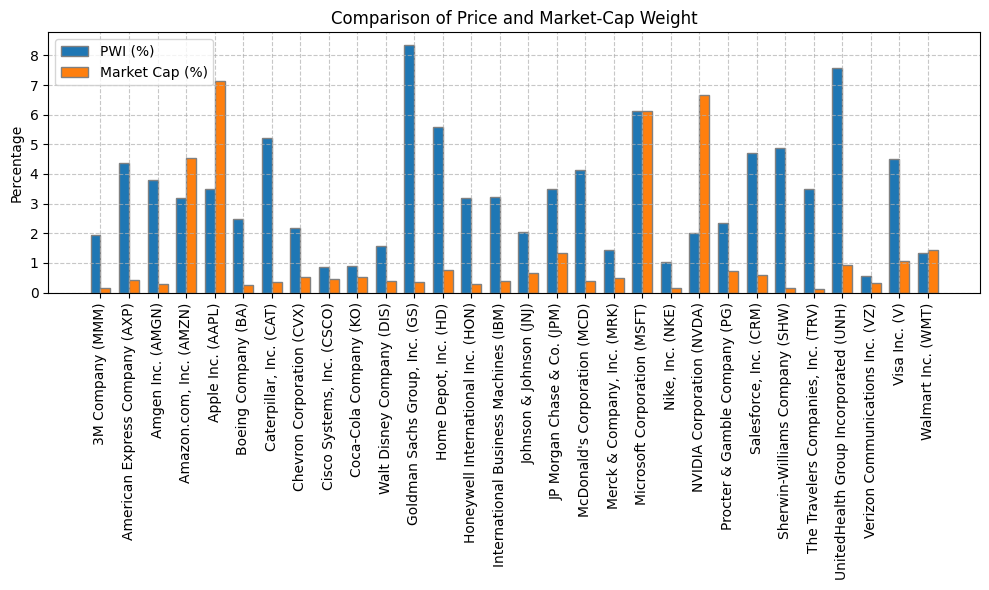

In [ ]:
comparison_df = djia[['Name', 'Ticker', 'PWI (%)', 'Market Cap (%)']].copy()
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
r1 = range(len(comparison_df))
r2 = [x + bar_width for x in r1]
ax.bar(r1, comparison_df['PWI (%)'], width=bar_width, edgecolor='grey', label='PWI (%)')
ax.bar(r2, comparison_df['Market Cap (%)'], width=bar_width, edgecolor='grey', label='Market Cap (%)')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Price and Market-Cap Weight')
ax.set_xticks([r + bar_width/2 for r in range(len(comparison_df))])
ax.set_xticklabels(comparison_df['Name'].apply(lambda x: x.replace(" (The)", "") if isinstance(x, str) else f"{x}".replace("nan", "")) + " (" + comparison_df['Ticker'] + ")", rotation=90)
ax.legend()
ax.grid(linestyle='--', alpha=0.7)
fig.tight_layout()
fig.savefig("./img/datapreprocessing/price_weight_distribution.svg")
fig.savefig("./img/datapreprocessing/price_weight_distribution.pdf")

# Height distribution

In [276]:
height_df = pd.read_csv('./datasets/height/height.csv')
height_df = height_df.dropna()
height_df = height_df[height_df["age"] == "20-29"]
height_df["percentage"] = height_df["percentage_under"].diff().fillna(0)
height_df["height (cm)"] = (height_df['height'].str.extract(r'(\d+)\'\s*(\d+)').astype(float).mul([12*2.54, 2.54]).sum(axis=1).round())
height_df

,height,sex,age,percentage_under,percentage,height (cm)
0,4'10'',M,20-29,0.0,0.0,147.0
1,4'11'',M,20-29,0.0,0.0,150.0
2,5'00'',M,20-29,0.0,0.0,152.0
3,5'01'',M,20-29,0.0,0.0,155.0
4,5'02'',M,20-29,0.0,0.0,157.0
5,5'03'',M,20-29,0.0,0.0,160.0
6,5'04'',M,20-29,3.7,3.7,163.0
7,5'05'',M,20-29,7.2,3.5,165.0
8,5'06'',M,20-29,11.6,4.4,168.0
9,5'07'',M,20-29,20.6,9.0,170.0


## Plot the distribution

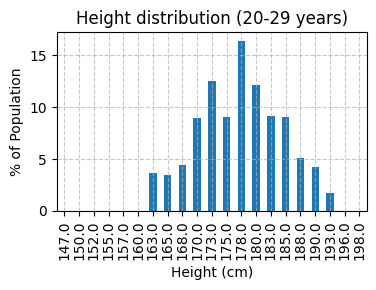

In [277]:
fig, ax = plt.subplots(figsize=(4, 3))
height_df.plot.bar(x="height (cm)", y="percentage", ax=ax)
ax.grid(linestyle='--', alpha=0.7)
ax.legend().remove()
ax.set_ylabel("% of Population")
ax.set_xlabel("Height (cm)")
ax.set_title("Height distribution (20-29 years)")
fig.tight_layout()
fig.savefig("./img/datapreprocessing/height_distribution.svg")
fig.savefig("./img/datapreprocessing/market_cap_distribution.pdf")

In [278]:
print(f"Mean: {height_df["height (cm)"].mean().round()}, Median: {height_df["height (cm)"].median().round()}")

Mean: 173.0, Median: 173.0


# Clustering with normalized data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D

# --- Step 1: Create realistic synthetic data with overlap ---
np.random.seed(42)

# Young, low income
age_young = np.random.normal(25, 3, 50)
income_young = np.random.normal(30000, 5000, 50)

# Middle-aged, medium income
age_mid = np.random.normal(40, 5, 60)
income_mid = np.random.normal(70000, 8000, 60)

# Older, high income
age_old = np.random.normal(60, 4, 40)
income_old = np.random.normal(110000, 10000, 40)

# Older with medium income (overlap)
age_old_medium = np.random.normal(58, 3, 20)
income_old_medium = np.random.normal(75000, 6000, 20)

# Combine
age = np.concatenate([age_young, age_mid, age_old, age_old_medium])
income = np.concatenate([income_young, income_mid, income_old, income_old_medium])
data = pd.DataFrame({'Age': age, 'Income': income})

# --- Step 2: Assign true age group labels for visualization ---
data['AgeGroup'] = pd.cut(data['Age'],
                          bins=[0, 30, 50, 100],
                          labels=['Young', 'Middle-aged', 'Older'])

# --- Step 3: KMeans without normalization ---
kmeans_no_norm = KMeans(n_clusters=3, random_state=42)
data['Cluster_NoNorm'] = kmeans_no_norm.fit_predict(data[['Age', 'Income']])

# --- Step 4: Min-Max normalization ---
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Income']])
data_scaled = pd.DataFrame(data_scaled, columns=['Age_Scaled', 'Income_Scaled'])
data_scaled['AgeGroup'] = data['AgeGroup']

# --- Step 5: KMeans with normalization ---
kmeans_norm = KMeans(n_clusters=3, random_state=42)
data_scaled['Cluster_Norm'] = kmeans_norm.fit_predict(data_scaled[['Age_Scaled', 'Income_Scaled']])

# --- Step 6: Visualization setup ---
markers = {'Young': 'o', 'Middle-aged': '^', 'Older': 's'}
cluster_colors = {0: 'red', 1: 'green', 2: 'blue'}

plt.figure(figsize=(13, 6))

# --- Without normalization ---
plt.subplot(1, 2, 1)
for group, marker in markers.items():
    subset = data[data['AgeGroup'] == group]
    for cluster_id, color in cluster_colors.items():
        cluster_subset = subset[subset['Cluster_NoNorm'] == cluster_id]
        plt.scatter(cluster_subset['Age'], cluster_subset['Income'],
                    color=color, marker=marker, edgecolor='black', alpha=0.8)
plt.title('K-Means without Normalization')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.grid(True)

# Add legend for age groups only
legend_elements = [Line2D([0], [0], marker=m, color='w', label=g,
                          markerfacecolor='gray', markersize=8, markeredgecolor='black')
                   for g, m in markers.items()]
plt.legend(handles=legend_elements, title="Age Groups", loc='lower right')

# --- With normalization ---
plt.subplot(1, 2, 2)
for group, marker in markers.items():
    subset = data_scaled[data_scaled['AgeGroup'] == group]
    for cluster_id, color in cluster_colors.items():
        cluster_subset = subset[subset['Cluster_Norm'] == cluster_id]
        plt.scatter(cluster_subset['Age_Scaled'], cluster_subset['Income_Scaled'],
                    color=color, marker=marker, edgecolor='black', alpha=0.8)
plt.title('K-Means with Min-Max Normalization')
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.grid(True)

# Add legend again for age groups
plt.legend(handles=legend_elements, title="Age Groups", loc='lower right')

plt.tight_layout()
plt.show()

# --- Step 7: Display centroids ---
print("Centroids without normalization:")
print(pd.DataFrame(kmeans_no_norm.cluster_centers_, columns=['Age', 'Income']))

print("\nCentroids with normalization:")
print(pd.DataFrame(kmeans_norm.cluster_centers_, columns=['Age_Scaled', 'Income_Scaled']))

# --- Step 8: Scale back normalized centroids to original range ---
centroids_norm_scaled = kmeans_norm.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids_norm_scaled)

print("\nCentroids with normalization (scaled back to original values):")
print(pd.DataFrame(centroids_original_scale, columns=['Age', 'Income']))

plt.savefig("img/datapreprocessing/clustering.svg")

# Clustering with skewed data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)

# --- Step 1: Create meaningful dataset ---
age1 = np.random.normal(25, 4, 80)
income1 = np.random.exponential(12000, 80) + 15000

age2 = np.random.normal(40, 6, 70)
income2 = np.random.exponential(20000, 70) + 40000

age3 = np.random.normal(58, 5, 50)
income3 = np.random.exponential(30000, 50) + 70000

age = np.concatenate([age1, age2, age3])
income = np.concatenate([income1, income2, income3])

data = pd.DataFrame({'Age': age, 'Income': income})

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig("age_histograms.svg")  # <-- save histogram figure
plt.show()

# --- Step 2: Histogram figure ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Income'], bins=30, color='steelblue', edgecolor='black')
plt.title('Skewed Income Distribution (Before Log Transform)')
plt.xlabel('Income ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(data['Income']), bins=30, color='seagreen', edgecolor='black')
plt.title('After Log Transform')
plt.xlabel('log(Income)')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig("income_histograms.svg")  # <-- save histogram figure
plt.show()  # close figure to free memory

# --- Step 3: K-Means clustering ---
kmeans_raw = KMeans(n_clusters=3, random_state=42)
data['Cluster_Raw'] = kmeans_raw.fit_predict(data[['Age', 'Income']])

data['Income_Log'] = np.log1p(data['Income'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Income_Log']])
data_scaled = pd.DataFrame(data_scaled, columns=['Age_Scaled', 'Income_Log_Scaled'])

kmeans_log = KMeans(n_clusters=3, random_state=42)
data_scaled['Cluster_Log'] = kmeans_log.fit_predict(data_scaled[['Age_Scaled', 'Income_Log_Scaled']])

# --- Step 4: Clustering figure ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['Age'], data['Income'], c=data['Cluster_Raw'], cmap='Set1', edgecolor='k', s=50)
plt.title('K-Means Clustering (Skewed Income)')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data_scaled['Age_Scaled'], data_scaled['Income_Log_Scaled'],
            c=data_scaled['Cluster_Log'], cmap='Set1', edgecolor='k', s=50)
plt.title('K-Means after Log Transform + Scaling')
plt.xlabel('Age (scaled)')
plt.ylabel('Log(Income) (scaled)')
plt.grid(True)

plt.tight_layout()
plt.savefig("clustering_figures.svg")  # <-- save clustering figure
plt.show()  # close figure to free memory

print("Figures saved as 'income_histograms.png' and 'clustering_figures.png'")
